In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [9]:
df = pd.read_excel("1b) ItosDelightSolutions.xlsx", skiprows=3, sheet_name="MSFT Stock Data")
df = df.loc[df['Date'] < pd.to_datetime("01/01/2003")]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log Return
0,2002-01-01,33.325001,35.009998,32.755001,34.279999,22.054296,226955000,NaN
1,2002-01-08,34.345001,35.310001,33.869999,34.235001,22.025352,298328000,-0.001313
2,2002-01-15,34.330002,35.000000,32.709999,33.049999,21.262959,308771200,-0.035228
3,2002-01-22,33.305000,33.314999,31.455000,31.910000,20.529537,331729400,-0.035102
4,2002-01-29,31.950001,32.250000,30.375000,30.559999,19.661007,328102800,-0.043227


In [10]:
sigma = np.std(df['Log Return']) * math.sqrt(52)
sigma

0.3490336310678408

In [11]:
def find_d1(s, k, r, t, sigma):
    t1 = math.log(s/k)
    t2 = (sigma**2)/2
    t3 = (r + t2)*t
    t4 = sigma*math.sqrt(t)
    return (t1+t3)/t4

def find_d2(s, k, r, t, sigma):
    d1 = find_d1(s, k, r, t, sigma)
    return d1 - sigma*math.sqrt(t)
    

def black_scholes_call(s, k, r, t, sigma):
    return (s*norm.cdf(find_d1(s,k,r,t,sigma))) - (k*math.exp(-1*r*t)*norm.cdf(find_d2(s,k,r,t,sigma)))
    

In [12]:
round(5000*((1+0.0625)**5), 2)

6770.41

In [23]:
call_price = black_scholes_call(18.75, 35, 0.062, 5, sigma)
call_price

3.7905572260500264

In [14]:
call_price*3000

11371.67167815008

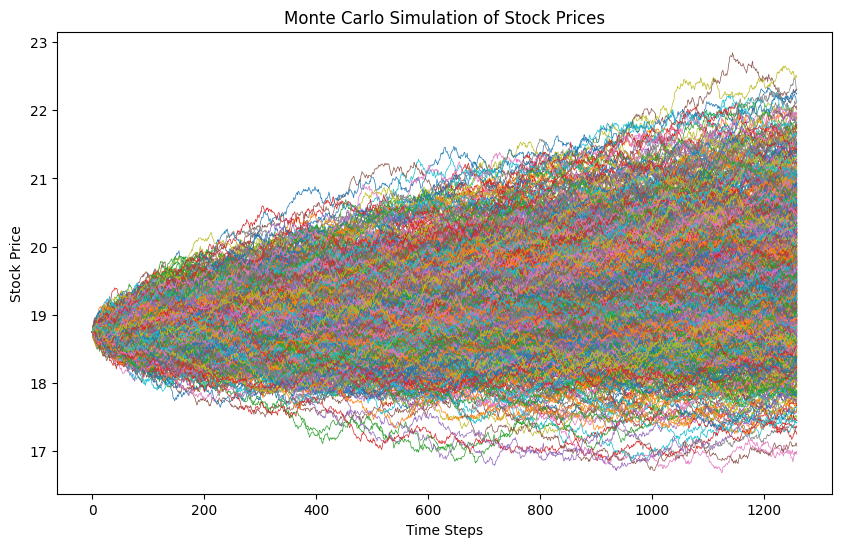

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
current_price = 18.75
annual_return = 0.07  # Annual return (drift)
annual_volatility = 0.35  # Annual volatility
days_per_year = 252  # Assuming 252 trading days in a year
years = 5  # Time horizon

# Calculate daily volatility
daily_volatility = annual_volatility / np.sqrt(days_per_year)

# Calculate drift factor
drift = annual_return - 0.5 * annual_volatility ** 2

# Simulation
num_simulations = 1000  # Number of simulations
num_days = days_per_year * years
dt = 1 / days_per_year  # Time step

# Generate random values for Z
random_values = np.random.normal(0, 1, size=(num_simulations, num_days))

# Simulate stock prices
price_matrix = np.zeros((num_simulations, num_days))
price_matrix[:, 0] = current_price

for i in range(1, num_days):
    price_matrix[:, i] = price_matrix[:, i - 1] * np.exp(
        (drift * dt) + (daily_volatility * np.sqrt(dt) * random_values[:, i])
    )

# Plot the simulations
plt.figure(figsize=(10, 6))
plt.title("Monte Carlo Simulation of Stock Prices")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.plot(np.arange(num_days), price_matrix.T, lw=0.5)
plt.show()
